## Library to visualize data: matplotlib

First of all, besides the usual charts you are familiar with, there are many other things (and some things work much better than what we are used to). Python can also create complex stuff.
There are several great websites that help you choose the right chart for your data:

https://www.data-to-viz.com/

https://datavizproject.com/

https://datavizcatalogue.com/RU/

In [17]:
%pip install matplotlib
%pip install pandas
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Today we will work with several datasets to look at different types of charts.

In [18]:
# our main library for visualizations
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# magic function to display charts in the notebook below the cells
%matplotlib inline

# Line plot (trend line, line plot): who lives in the forest?

First, we will work with a synthetic dataset "Who lives in the forest". We have a variable for the year and variables that indicate how many hares, lynxes, and carrots were in the forest that year.

In [19]:
# if the file is not in the working directory of jupyter, do not forget to specify the full path to it
# also note that the data in the file is separated not by commas, but by tabs - we will add a parameter that
# tells pandas the correct delimiter
forest = pd.read_csv('https://raw.githubusercontent.com/karpovmax/datasets_python_teaching/master/populations.txt', sep='\t')
forest.head()

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [20]:
forest.shape

(21, 4)

Let's first look at the object that matplotlib creates and understand how to plot graphs in it.
The first way to create a graph is plt.plot(), to which we can simply pass two arguments - what to put on the x-axis and what to put on the y-axis. If you have variables in numeric format, you will easily get a line plot.

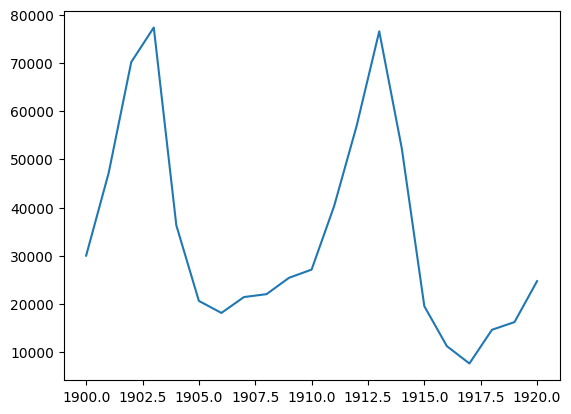

In [21]:
plt.plot(forest.year, forest.hare) # first argument - x, second argument - y.

To create a bar chart, change the plot function to bar.
All types of charts and functions can be found in the matplotlib documentation:
https://matplotlib.org/api/pyplot_summary.html

<BarContainer object of 21 artists>

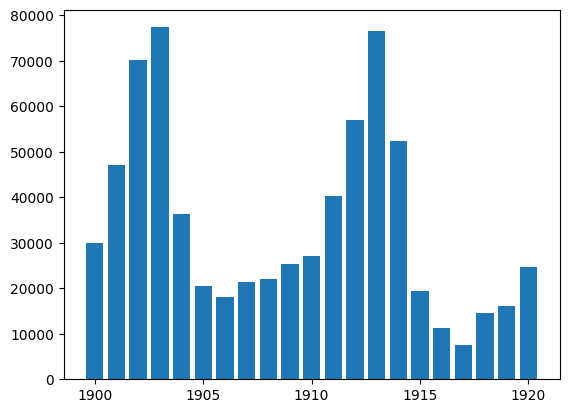

In [22]:
plt.bar(forest.year, forest.hare)

Let's return to our line plot, save it in a variable, and try to make it look nicer.

In an ideal world, we create plots using the subplots function (which can, for example, create a system of multiple plots) and store what it generates in two variables. They are usually called fig and ax.

The variable fig (or whatever you name it, the main thing is that it is the first variable you define) is responsible for the plot as a whole. Think of it as a file that stores the plot as an image.

The variable ax (the one we define second) is the coordinate axis on which we actually plot the graph. We can customize the appearance of this object (because all the elements of the plot are stored in it).

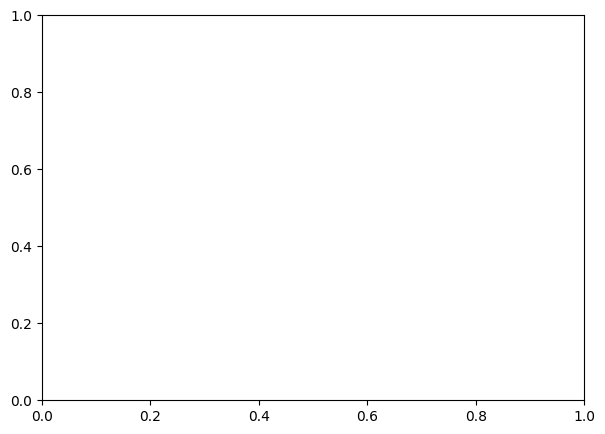

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))  # created an object with 1 row and 1 column of plots (surprise - one plot!)
                                             # Size - essentially the size of our rectangle in non-obvious units.
                                             # What size is good? Experiment!

Above, we created an empty coordinate axis. Now let's try to overlay a plot on it.

In [63]:
forest.head()  # let's look what variables we have.

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


Let's check how does our graph look by default

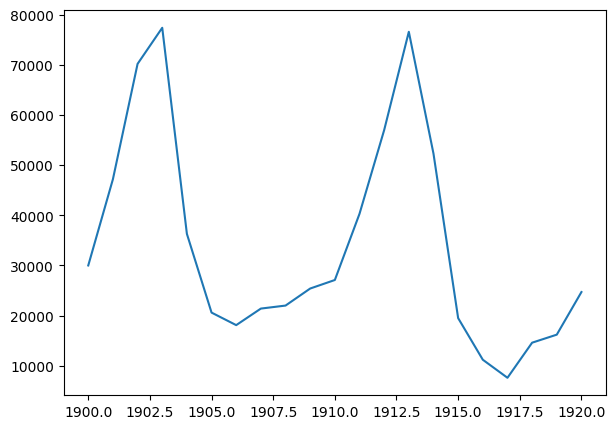

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))  # create the variable again to ensure you overwrite what is in it at each step,
                                             # if you want to make changes to the code
ax.plot(forest.year, forest.hare)  # note - we now plot the graph as a method of the ax object.
                                   # Below, all modifications to the graph are also applied to the object.
plt.show()

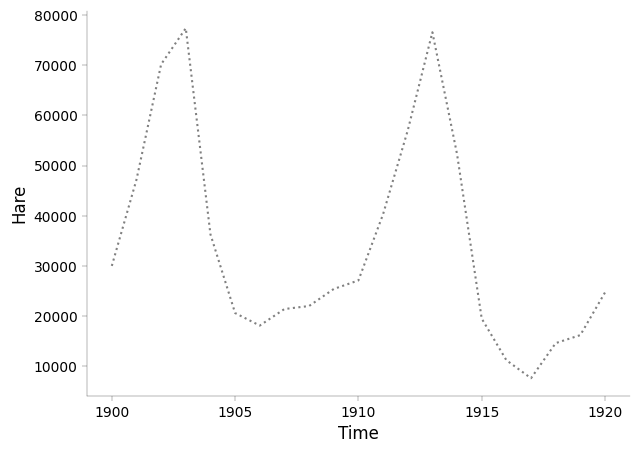

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# parameters of the plot itself (line color, style, etc.) are defined as parameters in the plot() method
# change the color and style of the line to dotted. Matplotlib knows some standard colors, and they can be set directly by name
# you can also pass a hex color. For example, #8c92ac
ax.plot(forest.year, forest.hare, color='grey', ls=':')

# if you noticed, in our very first plot the scale with years broke and became float. Matplotlib forcibly
# makes x a continuous variable for a line plot. We want to keep the year scale in integers.
ax.locator_params(integer=True)

# name the x and y axes, choose the font size.
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Hare', fontsize=12)

# make the right and top borders of the plot invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# make the ticks on the x and y axes thinner
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# reduce the thickness of the remaining plot borders using a loop (you can also do it without a loop with a separate line for each border, as done above)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.2)

More types of charts and parameters that we can change can be found in the Matplotlib documentation.

## Exercise
Now we will see how to create a system of plots and try to plot trends for all the inhabitants of our forest.

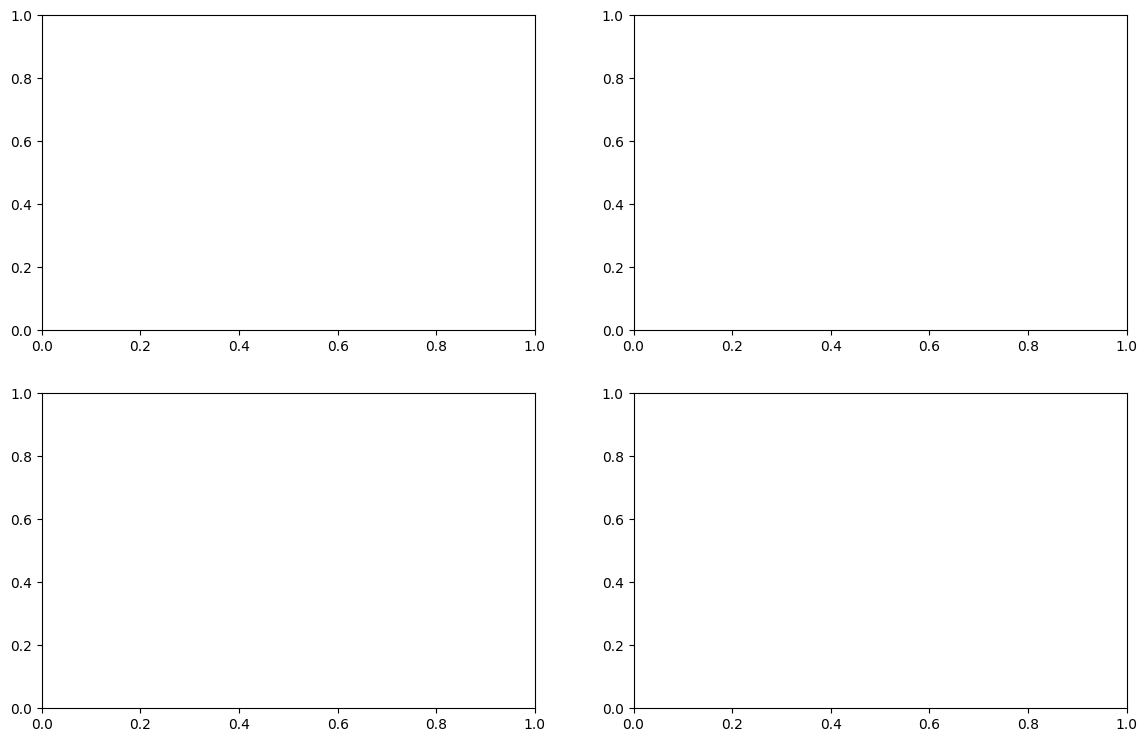

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))  # increase the number of objects to two rows and two columns. Also increase the image size.fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.

Great, now we have four plots. Now the ax object is a kind of matrix (or nested list - whichever is easier for you to understand). And to refer to each plot, you need to refer to it by index.

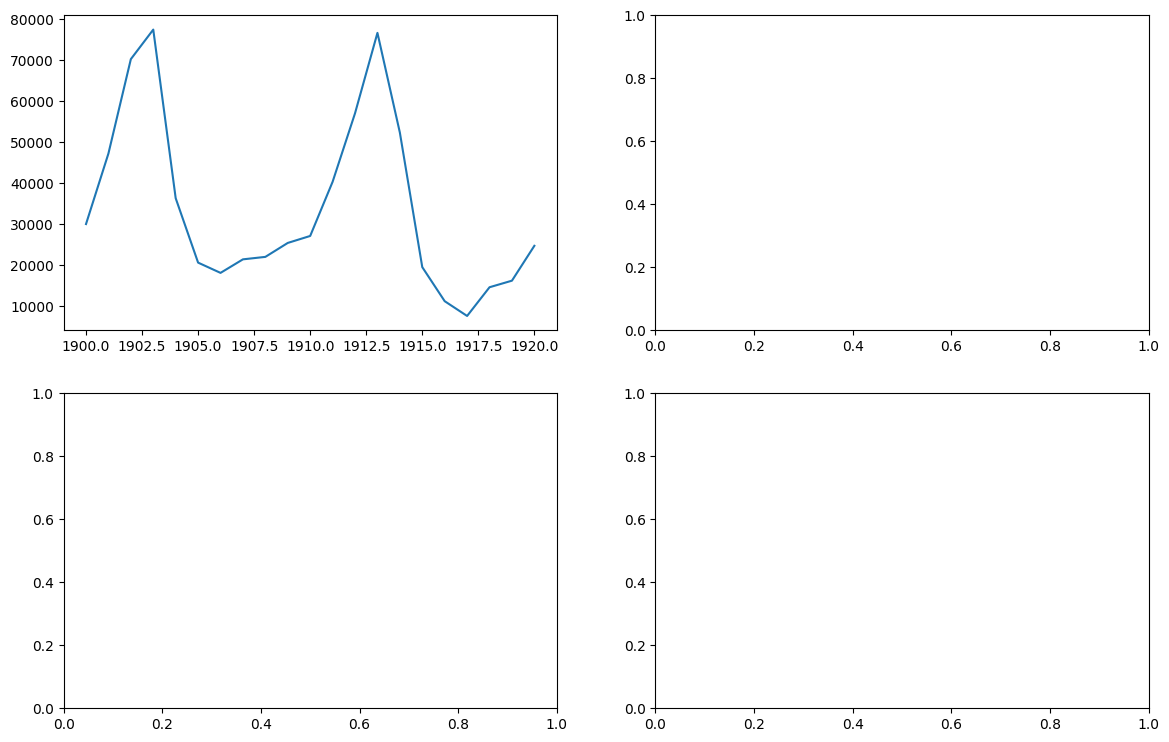

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))
ax[0][0].plot(forest.year, forest.hare)  # Refer to the first plot in the first column.

Below, we will see how to use a for loop to apply some modification to all the plots in the system.

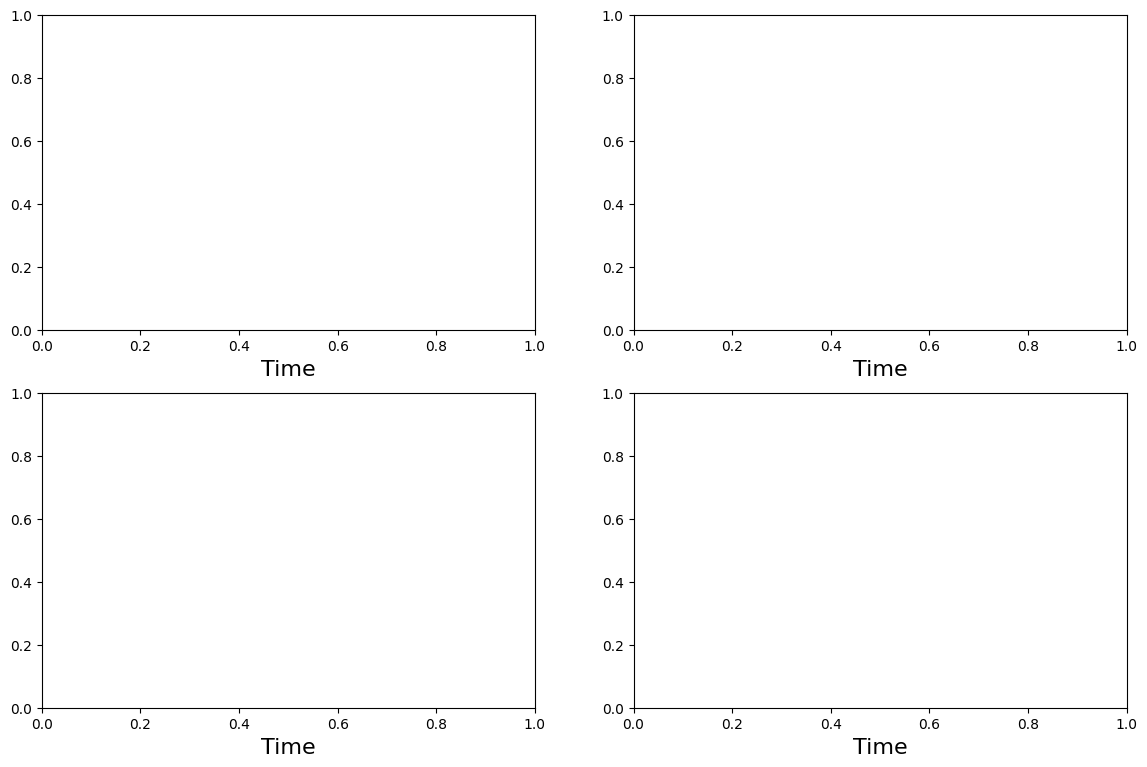

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize = 16)

**Task (10 minutes):**

* Draw the changes in the lynx population in the second plot.
* In the third plot - carrots.
* In the fourth plot - all three plots together (think about how).
* Each plot should be a different color. In the fourth plot - each plot should be the same color as in its cell.
* Label the y and x axes for each plot.

If you know the for loop - try to write a loop that would apply changes to the appearance of the plot en masse (for example, remove the top and right borders from all plots).


**Solution example:**

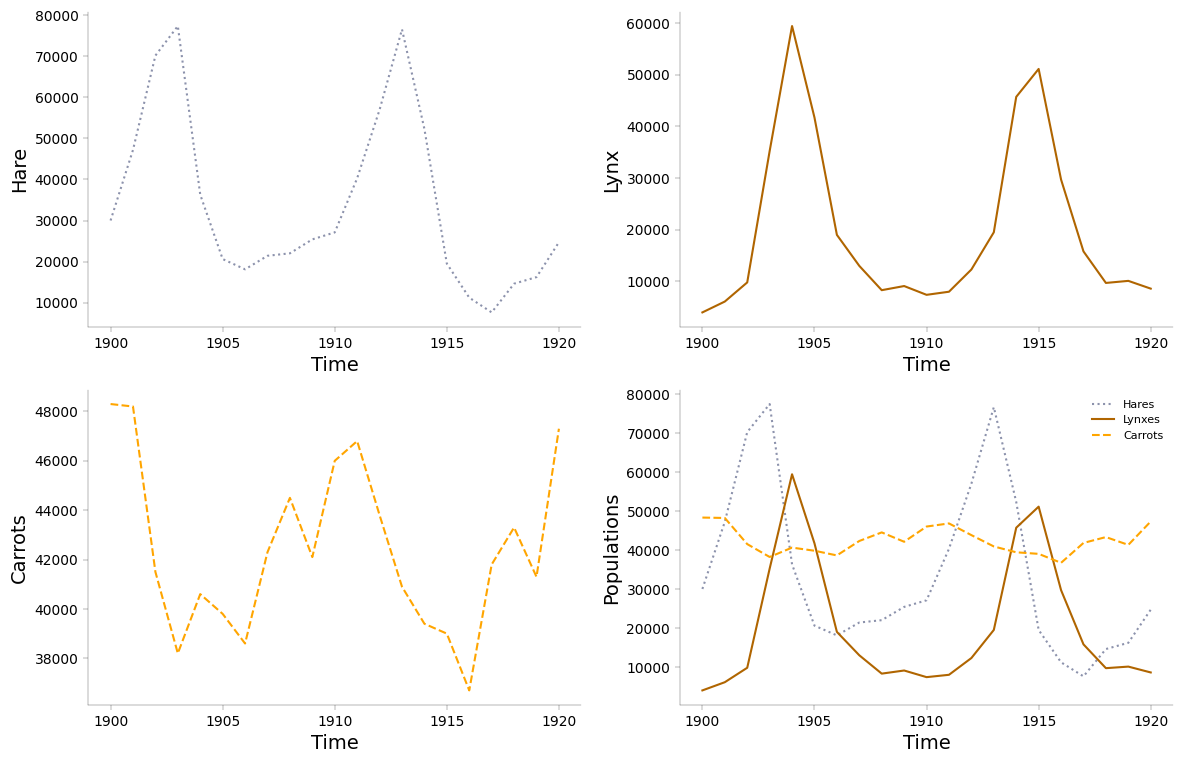

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize=14)
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

ax[0][0].plot(forest.year, forest.hare, color='#8c92ac', ls=':')
ax[0][0].set_ylabel('Hare', fontsize=14)

ax[1][0].plot(forest.year, forest.carrot, color='#ffa500', ls='--')
ax[1][0].set_ylabel('Carrots', fontsize=14)

ax[0][1].plot(forest.year, forest.lynx, color='#b06500', ls='-')
ax[0][1].set_ylabel('Lynx', fontsize=14)

ax[1][1].plot(forest.year, forest.hare, label='Hares', color='#8c92ac', ls=':')
ax[1][1].plot(forest.year, forest.lynx, label='Lynxes', color='#b06500', ls='-')
ax[1][1].plot(forest.year, forest.carrot, label='Carrots', color='#ffa500', ls='--')
ax[1][1].set_ylabel('Populations', fontsize=14)
ax[1][1].legend(loc=1, fontsize=8, frameon=False)  # set the legend. loc determines its location (experiment!), frameon - presence of a frame around the legend.

In [75]:
# save the plot. If you do not specify a path, it will be saved in the folder that jupyter currently considers the working directory
# (what you see on the first screen in the browser when you start jupyter)
fig.savefig("my_new_plot.png")

# Multivariate scatter plot: crimes in the USA

Now we will work with a dataset that contains information about the number of crimes in US states in 2005.

In [76]:
crimes = pd.read_csv('https://raw.githubusercontent.com/karpovmax/datasets_python_teaching/master/crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


Let's start with a plot with two variables. It's simple here - a continuous variable on the x-axis, a continuous variable on the y-axis: and the point at the intersection of the x and y values is the position of our state in this coordinate system. Let's first plot a graph for murders and robberies. A scatter plot can also be used for categorical variables - we will see this in another example.

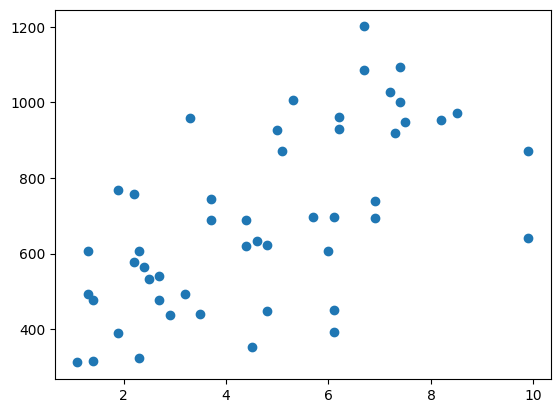

In [77]:
fig, ax = plt.subplots()  # if you need to create one plot, you can omit the number of plots in the arguments
ax.scatter(crimes['murder'], crimes['burglary'])  # use scatter instead of plot method

Try to interpret the graph above. Next, we will try to encode two more variables in it. Any ideas how?

A multivariate plot is a plot from which we can read values for more than two variables. The simplest way to encode additional information is by color and size of the point. Let's add the value of the population variable (state population) to the plot as the size of the point.

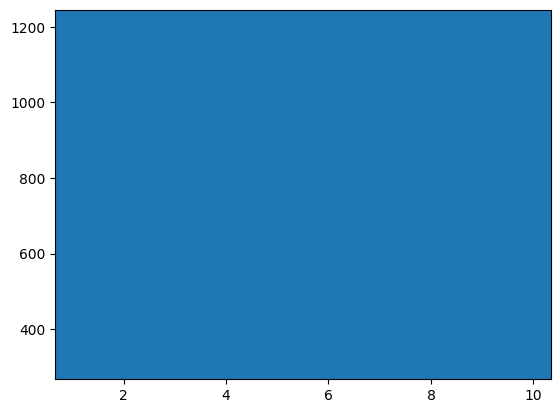

In [78]:
fig, ax = plt.subplots()

# add the parameter s (size) and specify which variable will be responsible for it
ax.scatter(crimes['murder'], crimes['burglary'], s=crimes['population'])

Wow! The population size is so large that the point has taken over the entire coordinate area. Let's try to scale our variable - we are interested in the relative sizes of the states relative to each other, not the absolute values. The scaling values are also chosen experimentally: what looks better and is more informative.

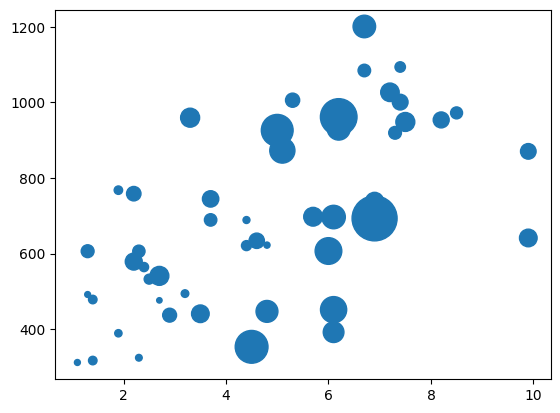

In [79]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000)

Great, but some points have merged. Let's add a transparency parameter to see where they overlap.

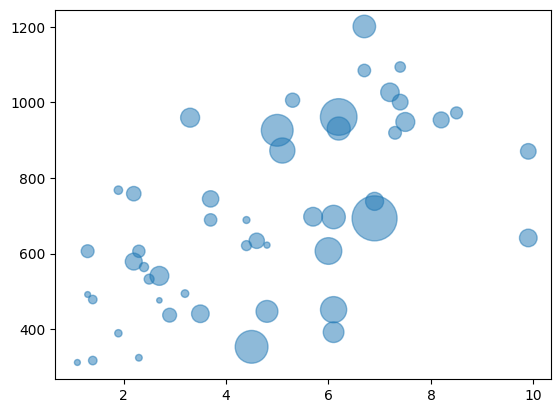

In [80]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5) # parameter alpha sets transparency of the dot from 0 to 1

Let's try to interpret this graph. Then we will add another variable in the form of color.

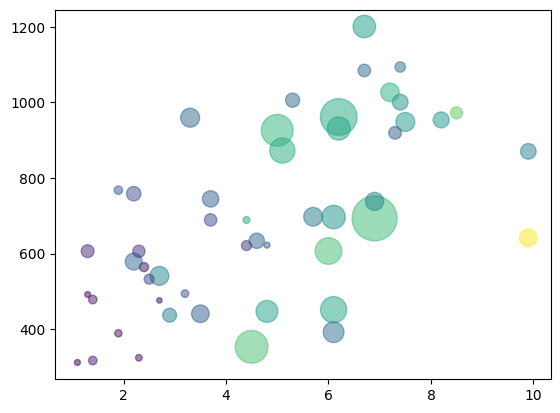

In [81]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s=crimes['population']/35000, alpha=0.5, 
           c=crimes['Robbery'])  # set the new argument c (color) and assign it the value of the variable

It remains to find out what each color means. To do this, you need to save the plot in a variable and pass it as an argument to the colorbar() function.
We can also change the color scale using the cmap argument (what color maps are available in matplotlib? Google the documentation!).

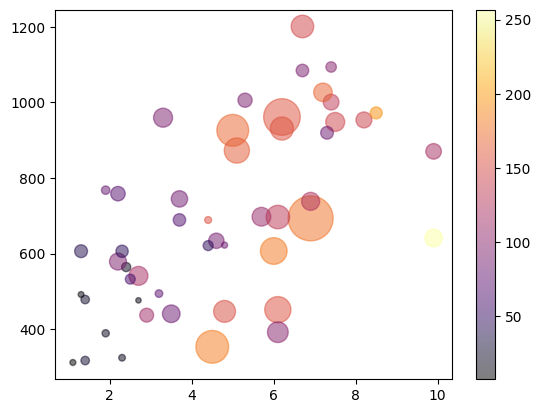

In [82]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph)

Shall we interpret?

**Make it prettier and label the states**

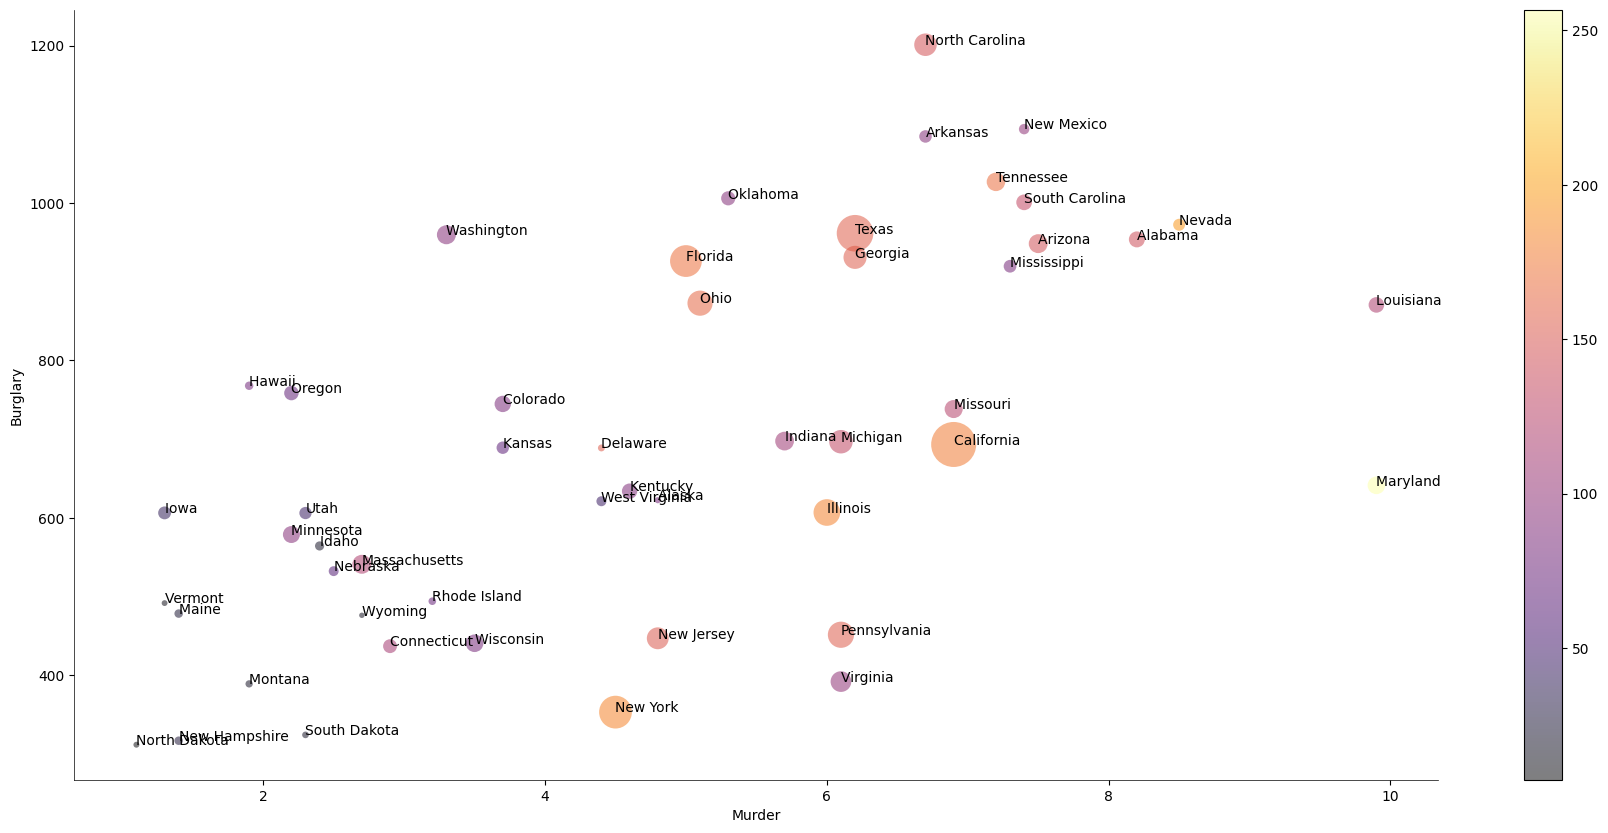

In [83]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s=crimes['population']/35000, c=crimes['Robbery'], cmap='inferno', alpha=0.5, linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Burglary', fontsize=10)

for i, state in enumerate(crimes['state']):  # using enumerate, create an object of tuples in the form of index - state name from the columns with state names.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10)  # use the annotate method, which tells it to take the state name
                                                                                    # from the tuple created using enumerate, and set the label coordinates through
                                                                                    # the values of our x and y variables for the desired index from the enumerate object (refers to the desired
                                                                                    # row in the dataframe)

plt.colorbar(color_graph)
plt.savefig('crimes.png')  # save

In [84]:
# see what is inside the enumerate object
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom

# Scatter plot on an aggregated dataset (plotting in a loop)

The next small example will be done on the gapminder project dataset - a set of socio-economic indicators for a number of countries over 200 years. We will take a small slice of the dataset from 1957 with a five-year step and two variables - GDP per capita and life expectancy.

www.gapminder.org

In [85]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/karpovmax/datasets_python_teaching/master/gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [86]:
gapminder.shape

(1704, 6)

In [87]:
gapminder.year.values  # lets look what values are stored in the year column

array([1952, 1957, 1962, ..., 1997, 2002, 2007])

Let's make the continent column categorical because encoding categories as strings won't work.

In [45]:
gapminder['continent'] = pd.Categorical(gapminder['continent'])

In [46]:
gapminder['continent'].cat.codes.head()  # now we have a numerical encoding of categories that we can feed to the plot variable

0    2
1    2
2    2
3    2
4    2
dtype: int8

We also want to logarithmize the gdp variable. Many variables related to income, for example, have a logarithmic distribution (which makes sense - we have a lot of people or countries with some small income and a very long tail of observations with large values on the scale).

(array([1.365e+03, 2.150e+02, 9.600e+01, 1.900e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([   241.1658765 ,  11569.36257885,  22897.5592812 ,  34225.75598355,
         45553.9526859 ,  56882.14938825,  68210.3460906 ,  79538.54279295,
         90866.7394953 , 102194.93619765, 113523.1329    ]),
 <BarContainer object of 10 artists>)

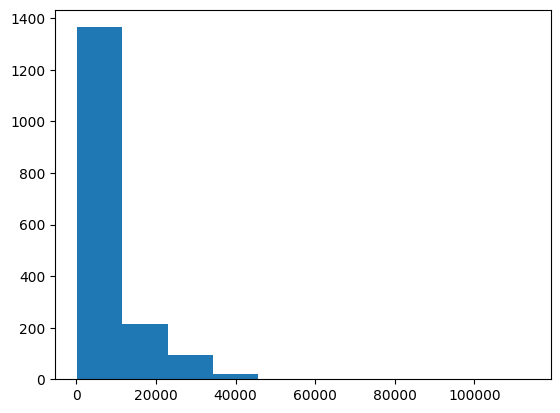

In [47]:
plt.hist(gapminder['gdpPercap'])

With logarithmic scaling, we will get rid of the long tail (below we will see how this affects the plot).
You need to worry about logarithmic scales in statistical models because this will change the interpretation of the coefficients. For now, it is enough for us to understand that countries located further to the right on the scale have a higher GDP per capita.

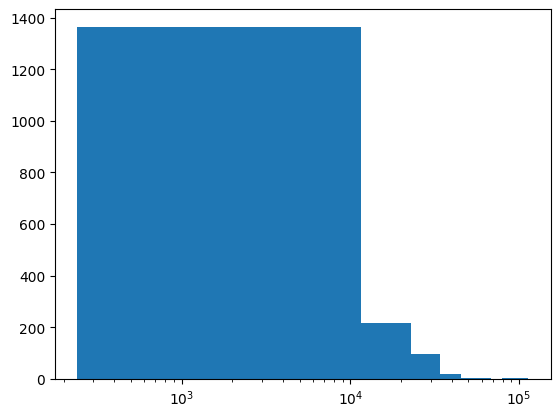

In [48]:
plt.hist(gapminder['gdpPercap'])
plt.xscale('log')


## Exercise
Now in the dataset, we have each country for each year from 1952 to 2007.
Let's make a slice for the year 1952 and try to plot a scatter plot (almost the same as we did above):

* x - income
* y - life expectancy
* size - population
* color - continent

Label the x and y axes.

**Example without log transformation of the x scale**

(0.0, 100000.0)

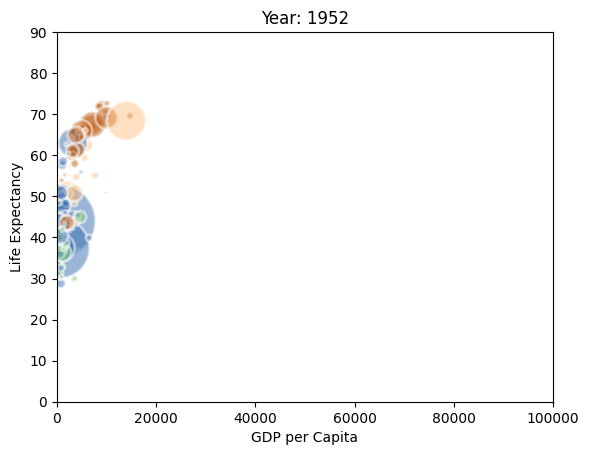

In [49]:
tmp = gapminder[gapminder.year == 1952]
plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s=tmp['pop']/200000, 
            c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.5, 
            edgecolors="white", linewidth=2)  # added two new arguments - color and border outline of points.
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: " + str(1952))  # plot title
plt.ylim(0, 90)  # let's also add scale limits so that the scale does not change when we plot for other years
plt.xlim(0, 100000)

**The same, but with log transformation**

(100.0, 100000.0)

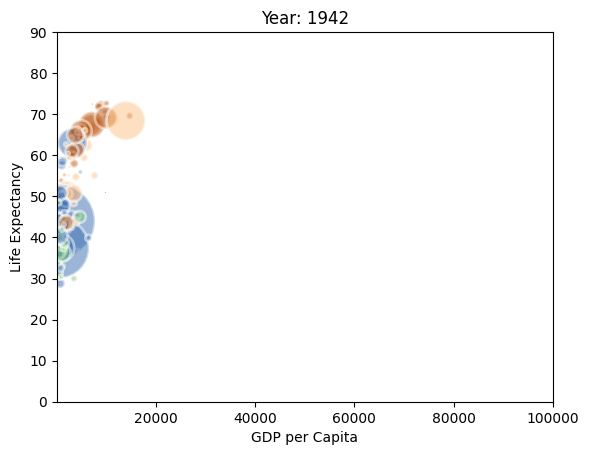

In [50]:
tmp = gapminder[gapminder.year == 1952 ]
plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000 , 
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5, edgecolors="white", linewidth=2)  
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1942) ) 
plt.ylim(0, 90)
plt.xlim(100,100000) # changing limits for log

Now let's automate this beauty to get a plot for each five-year period from 1952 to 2007. Then, if desired, we can assemble them into a gif in some program and get an animated plot.

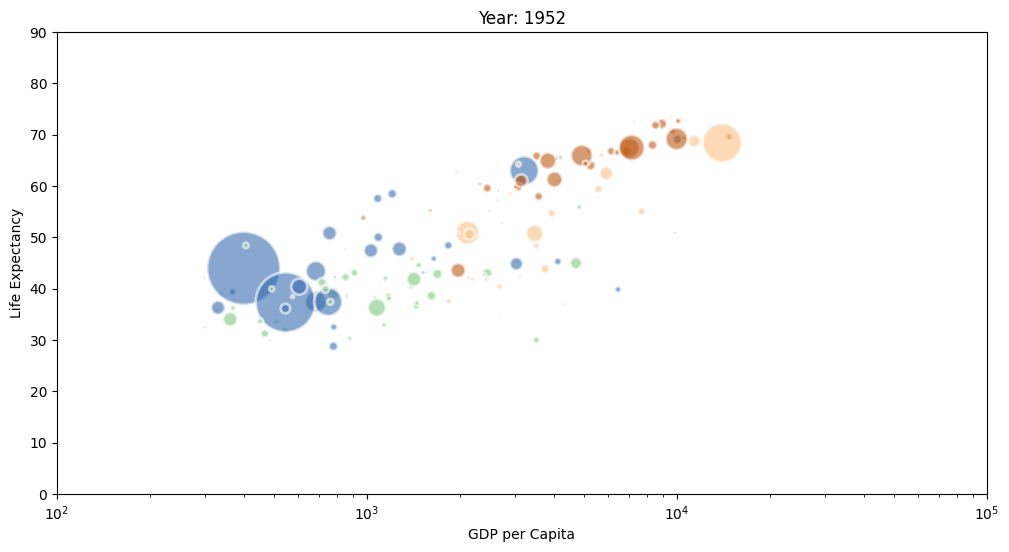

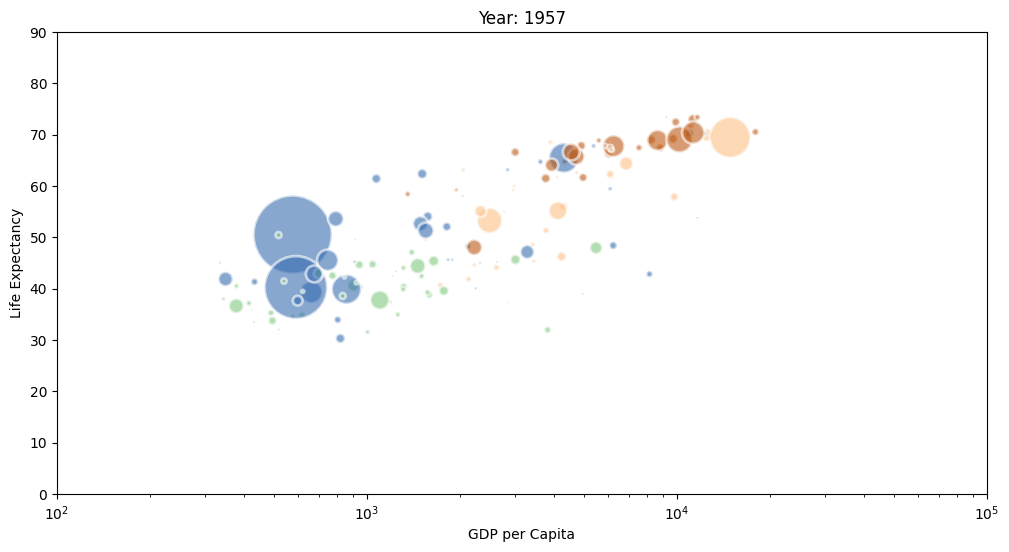

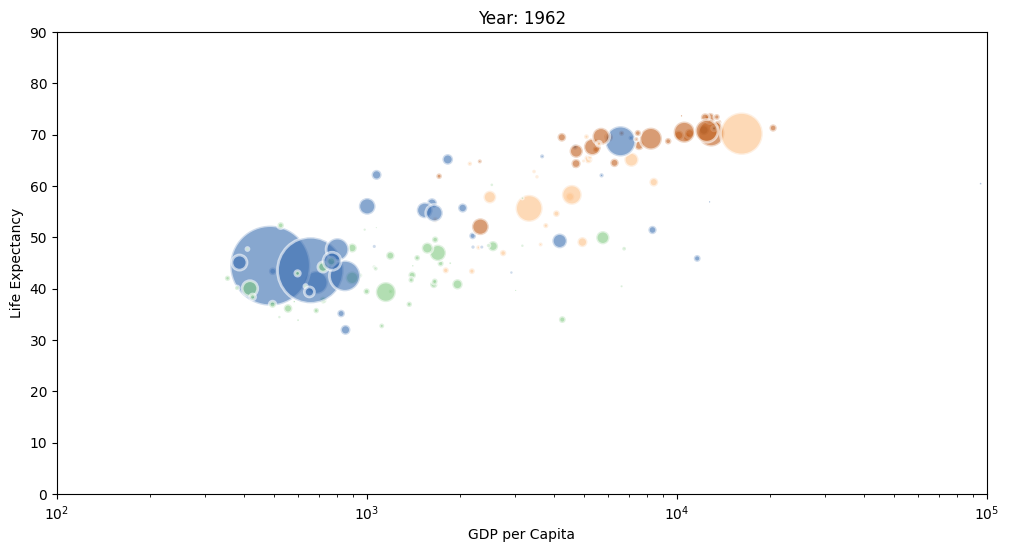

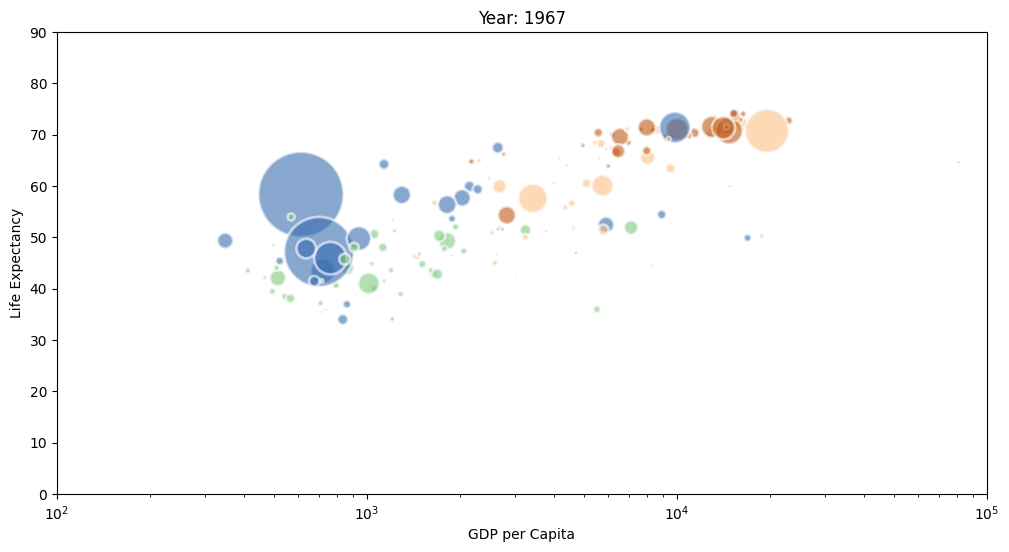

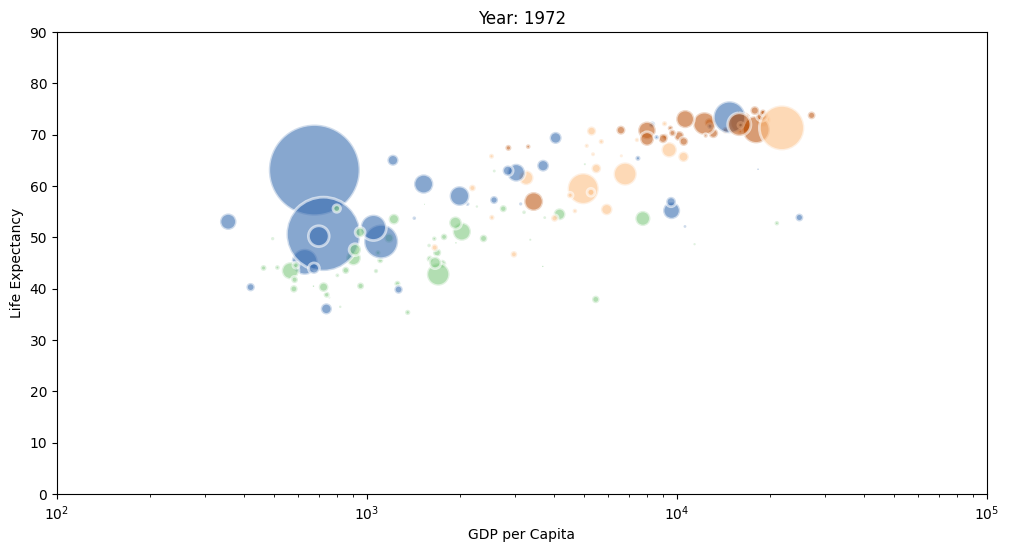

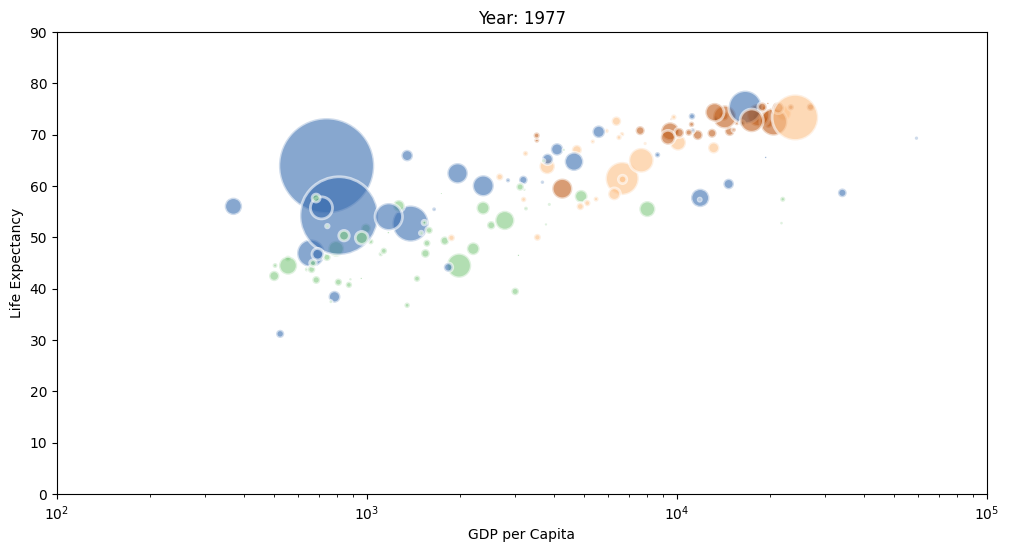

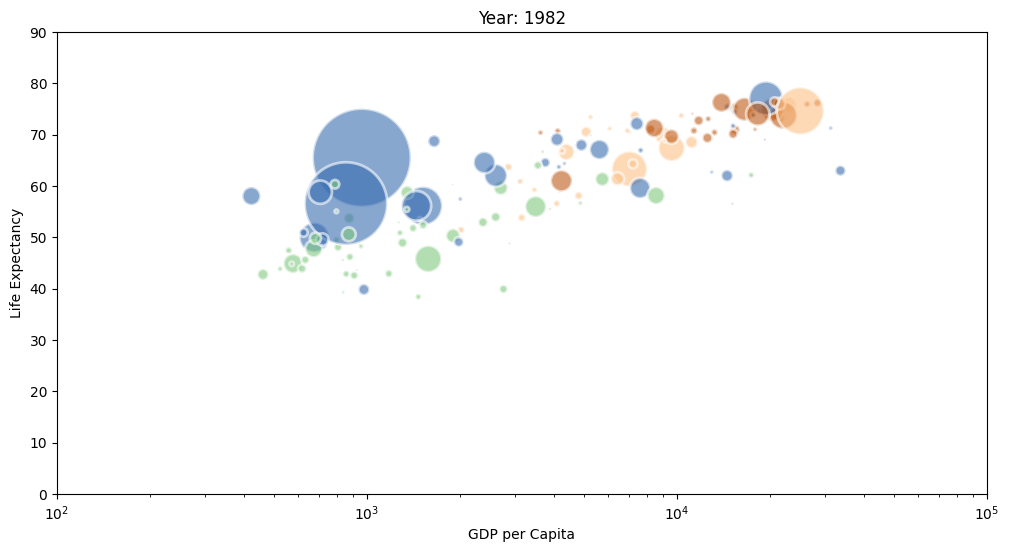

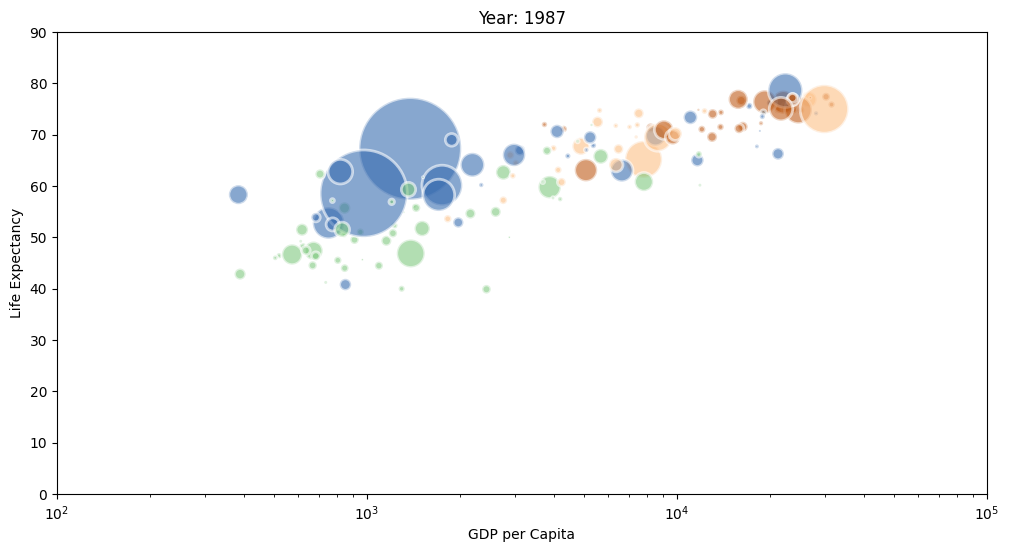

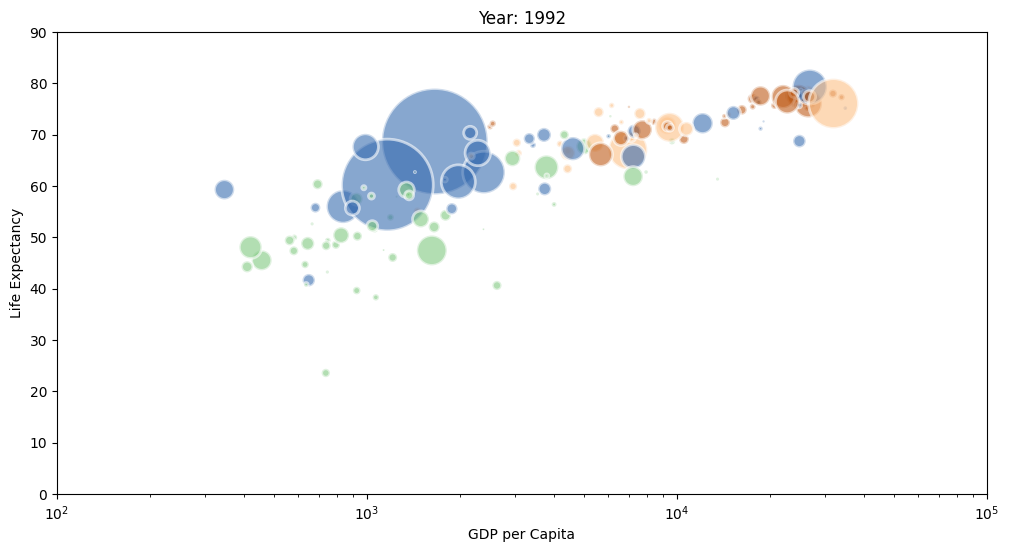

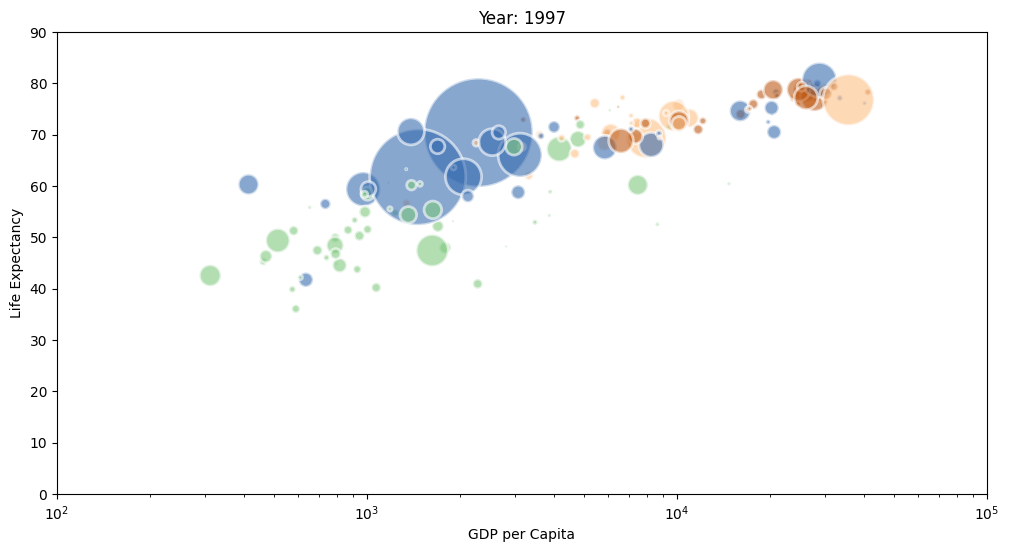

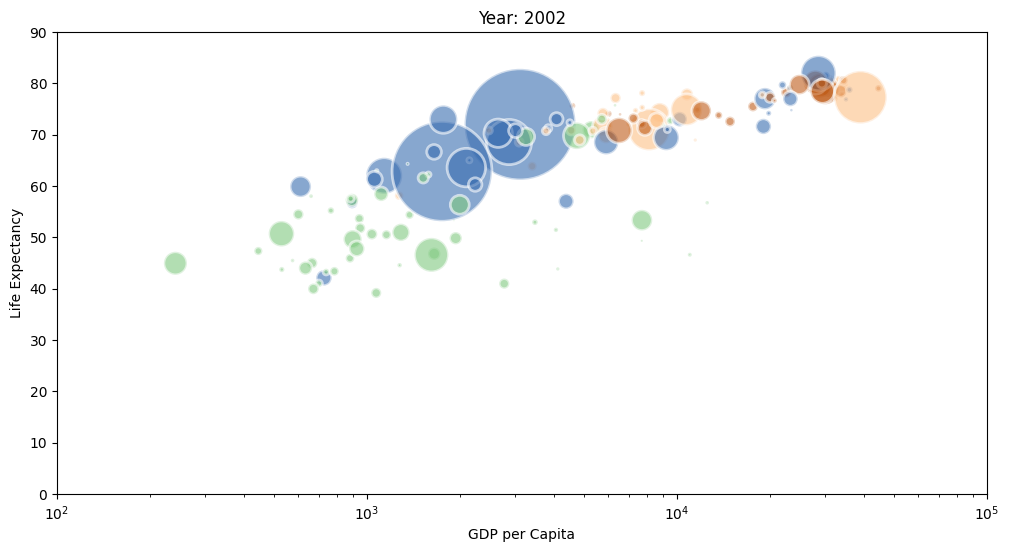

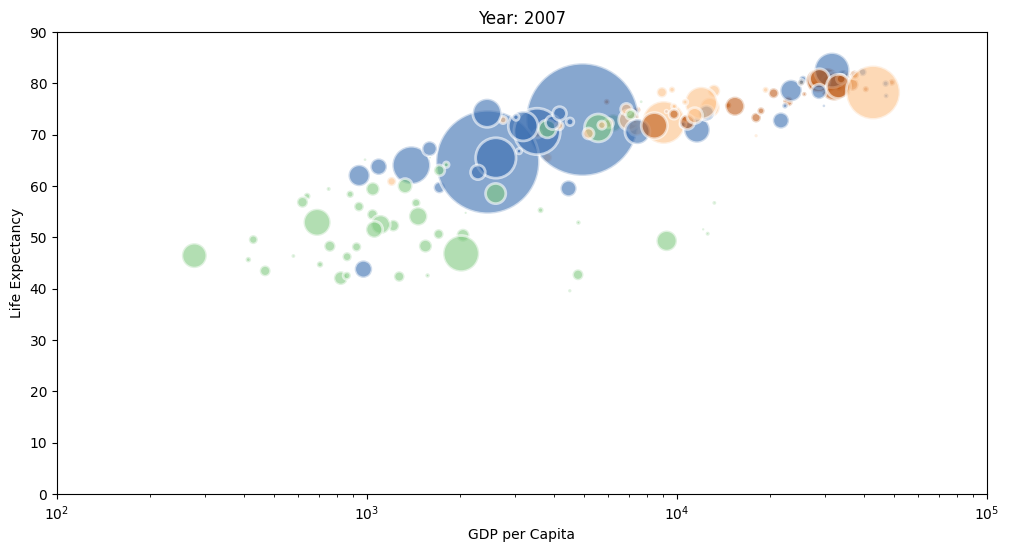

In [51]:
for i in gapminder.year.unique():  # write a loop that goes through all unique values in the year column

    # create a figure
    fig = plt.figure(figsize=(12, 6))

    tmp = gapminder[gapminder.year == i]  # create a slice of the dataframe for the year in the current iteration
    plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s=tmp['pop']/200000, 
                c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    plt.xscale('log')
    plt.xlabel("GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: " + str(i))
    plt.ylim(0, 90)
    plt.xlim(100, 100000)
    
    # Save each plot with a unique name.
    filename = 'Gapminder_step' + str(i) + '.png'
    plt.savefig(filename, dpi=96)

## Plots for categorical variables: bar charts and scatter plots for categorical variables

Here we will work based on this notebook.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

We will work with a dataset that counts the number of deaths in movies (the data collection methodology can be found at the link above). We will look at several plots in the lesson, and the rest can be studied independently.

Very often, to get the plot we want, we need to do the right grouping. We will work on that here as well.

In [52]:
movies = pd.read_csv('https://raw.githubusercontent.com/karpovmax/datasets_python_teaching/master/bodycount_Directors_Genra.csv', index_col=0)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7.0,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7.0,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7.0,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027


Note that we are working with a dataset where the same movie can appear multiple times (this is because it can belong to multiple genres or have multiple directors - this information adds additional rows). Therefore, for some aggregations, we will remove duplicates from the Film column to avoid duplication.

In [53]:
movies.shape # size of original dataframe

(1682, 10)

In [54]:
movies.drop_duplicates('Film').shape # size of dataframe without duplicates

(537, 10)

Let's group the movies by year and sum the values to create a bar chart.

## Aggregation by years. Bar chart

Let's create two bar charts that show the number of movies for each year and the total number of on-screen deaths.

In [55]:
movies_year = movies.drop_duplicates('Film').groupby('Year').sum()

In [56]:
movies_year.tail()

,Film,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Year,,,,,,,,,
2007,28 Weeks Later30 Days of Night3003:10 To YumaA...,4095.0,RRRRRRRRRPG-13PG-13RRPG-13PGPG-13UnratedUnrate...,HorrorHorrorActionAdventureActionBiographyBiog...,Juan Carlos FresnadilloDavid SladeZack SnyderJ...,5475,327.8,48,35.992220
2008,AppaloosaBangkok DangerousCloverfieldDoomsdayF...,1785.0,RRPG-13RPG-13RPG-13PG-13PG-13PG-13RRRRRRRRPG-1...,CrimeActionActionActionAdventureComedyActionAc...,Ed HarrisOxide Pang Chun|Danny PangMatt Reeves...,2850,170.9,26,16.522174
2009,Black DynamiteDistrict 9Friday the 13thInglour...,605.0,RRRRRRPG-13RRRR,ActionActionHorrorAdventureHorrorActionActionA...,Scott SandersNeill BlomkampMarcus NispelQuenti...,1235,75.3,11,5.708305
2010,Kick-AssMacheteShutter IslandThe Expendables,519.0,RRRR,ActionActionDramaAction,Matthew VaughnEthan Maniquis|Robert RodriguezM...,463,29.0,4,4.528441
2013,Olympus Has Fallen,156.0,R,Action,Antoine Fuqua,119,6.5,1,1.310924


Text(0.5, 1.0, 'Total Body Count')

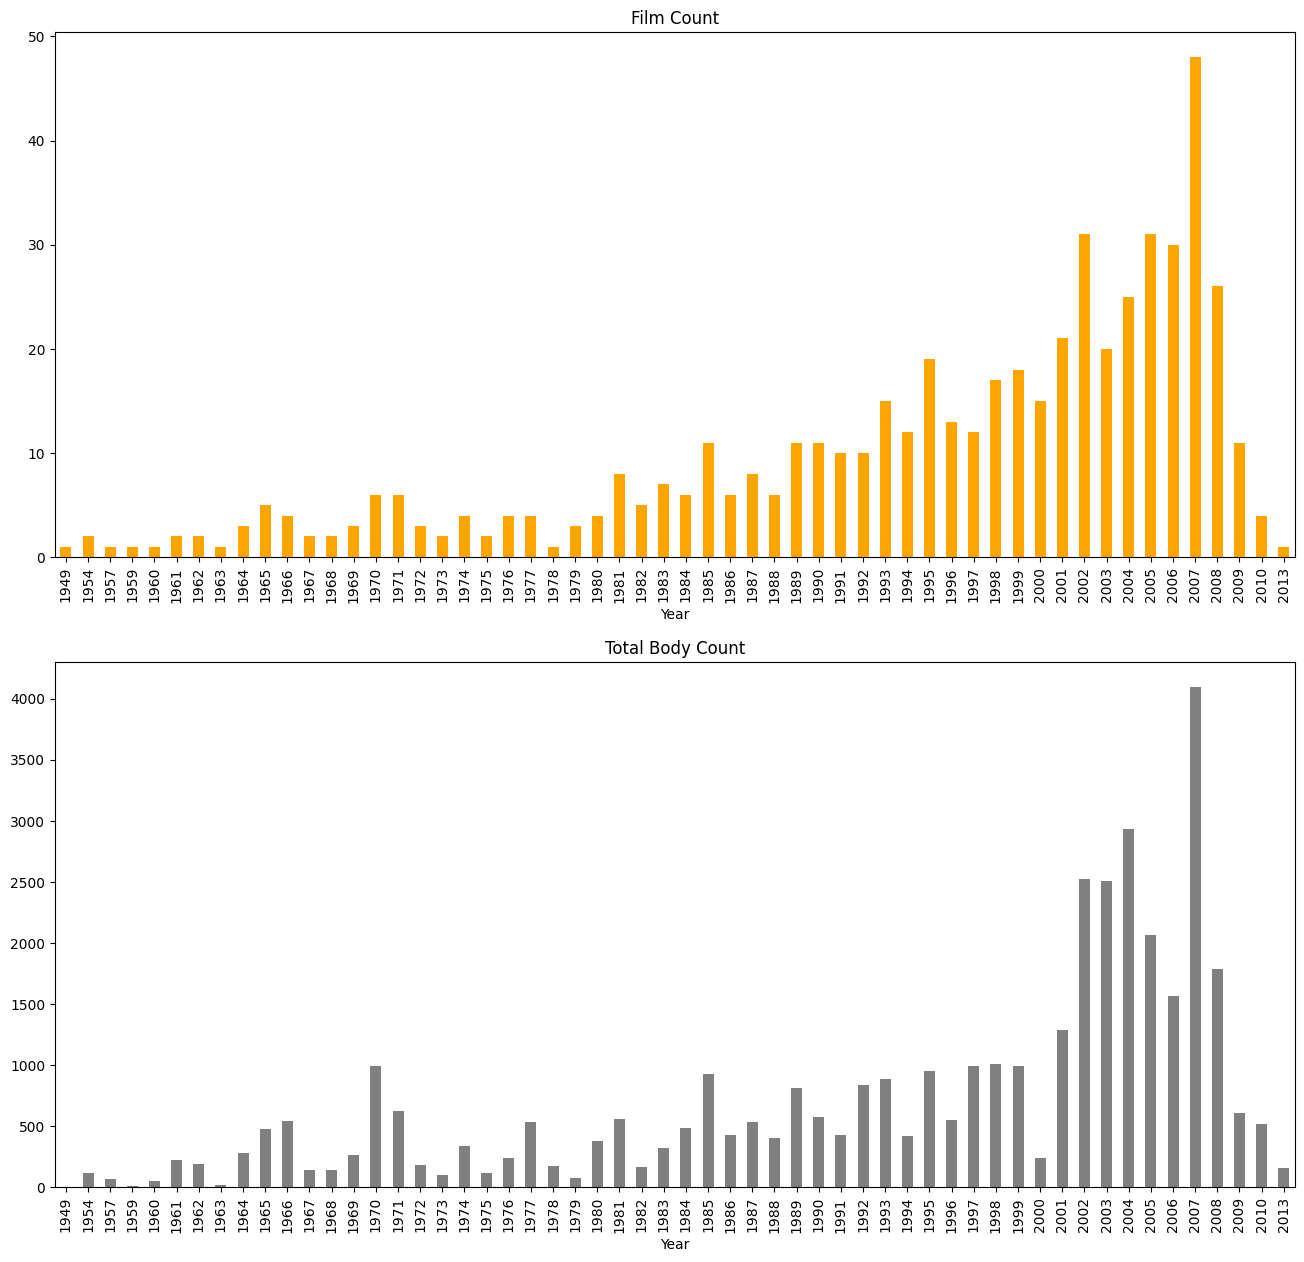

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

# note that here we change the syntax - create a plot, apply the plot method from pandas to the column.
# And already in the parameters of this method, we specify the type of plot and the coordinate axis on which we want to place it.
# With this approach, each year will be displayed on the coordinate axis

movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color='#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color='grey')
ax[1].set_title('Total Body Count')

## Aggregation by movies. Sorting by values. Horizontal bar chart

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [58]:
movies_film = movies.drop_duplicates('Film').set_index('Film')  # aggregate and set the movie title as the index, as the index will become the scale
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027
28 Weeks Later,2007,212.0,R,Horror,Juan Carlos Fresnadillo,100,7.0,1,2.120000
30 Days of Night,2007,67.0,R,Horror,David Slade,113,6.6,1,0.592920
300,2007,600.0,R,Action,Zack Snyder,117,7.7,1,5.128205


Now we will group the dataset by movies, find the 10 most violent ones, and visualize them.

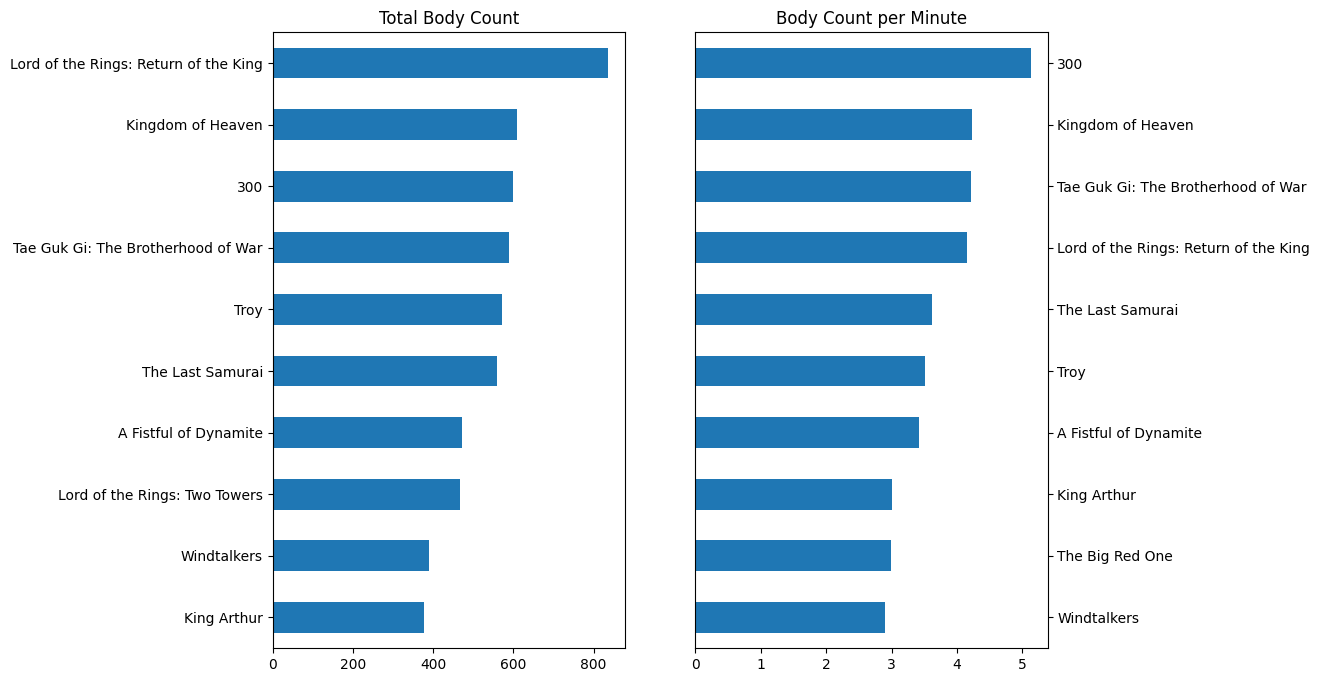

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# plot for the number of people killed in the movie. Make a horizontal plot with the barh parameter (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(kind='barh', ax=ax[0]) 
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(kind='barh', ax=ax[1])  # for the number of people killed per minute of the movie

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)  # remove the label for the scale, which is generated automatically

# Ratings: scatter plot for a categorical variable

Scatter plots for categorical variables also have their place. In this case, we will have a categorical variable on the x-axis (movie letter rating). Such a plot helps us see the spread of values within categories, as well as some correlations and dependencies. Just don't forget to add transparency, because in the case of categorical variables, a large number of points can overlap each other.

In [60]:
movies['MPAA_Rating'].value_counts()

MPAA_Rating
R           1039
PG-13        383
PG           114
Unrated       70
Approved      28
M             13
GP            13
G             11
X             10
NR             1
Name: count, dtype: int64

**Exercise:**

Create a scatter plot for MPAA_Rating on the x-axis, Body_Count_Min on the y-axis, and use the absolute value of Body Count as the size of the point.

Text(0, 0.5, 'Body count per minute')

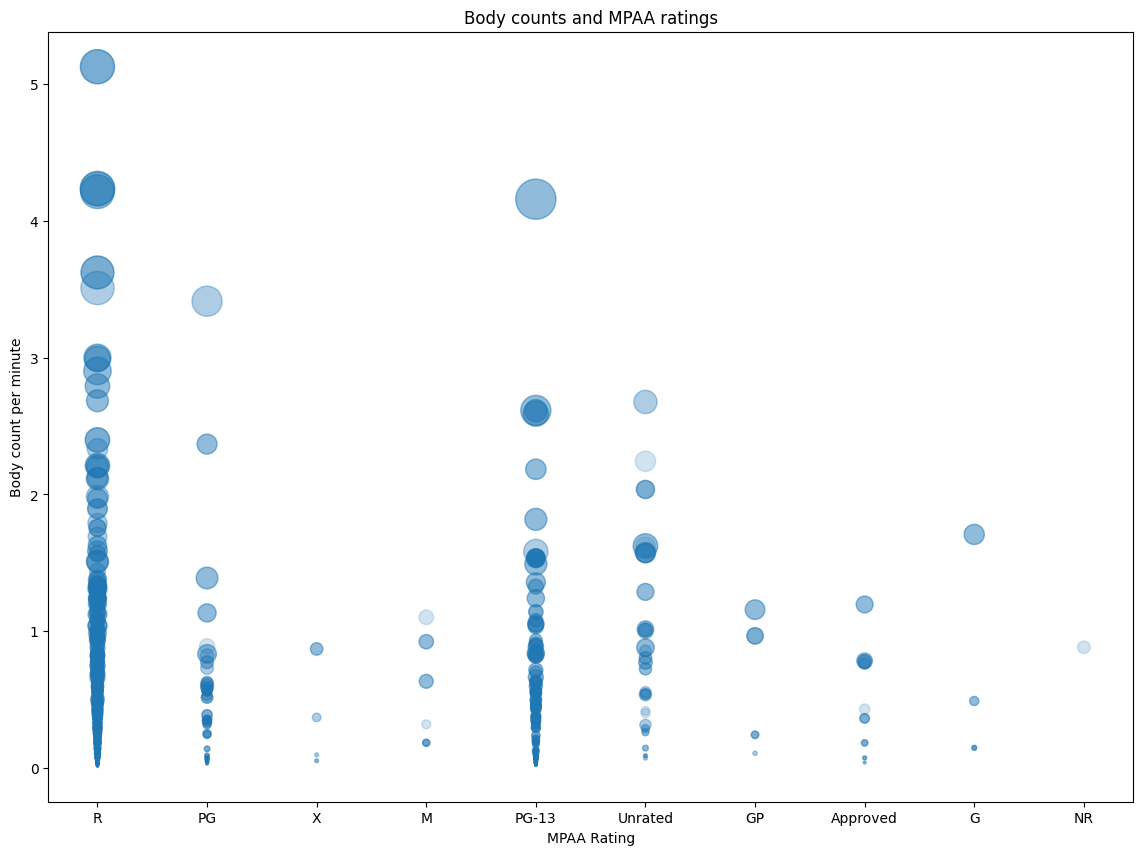

In [61]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['MPAA_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.2)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Body count per minute')


Interpret the plot.



Also, for working with such data, you may need plots like swarmplot (for example, available in the seaborn library). In such a plot, the column of the variable is slightly expanded, allowing the points to spread out horizontally.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 were given

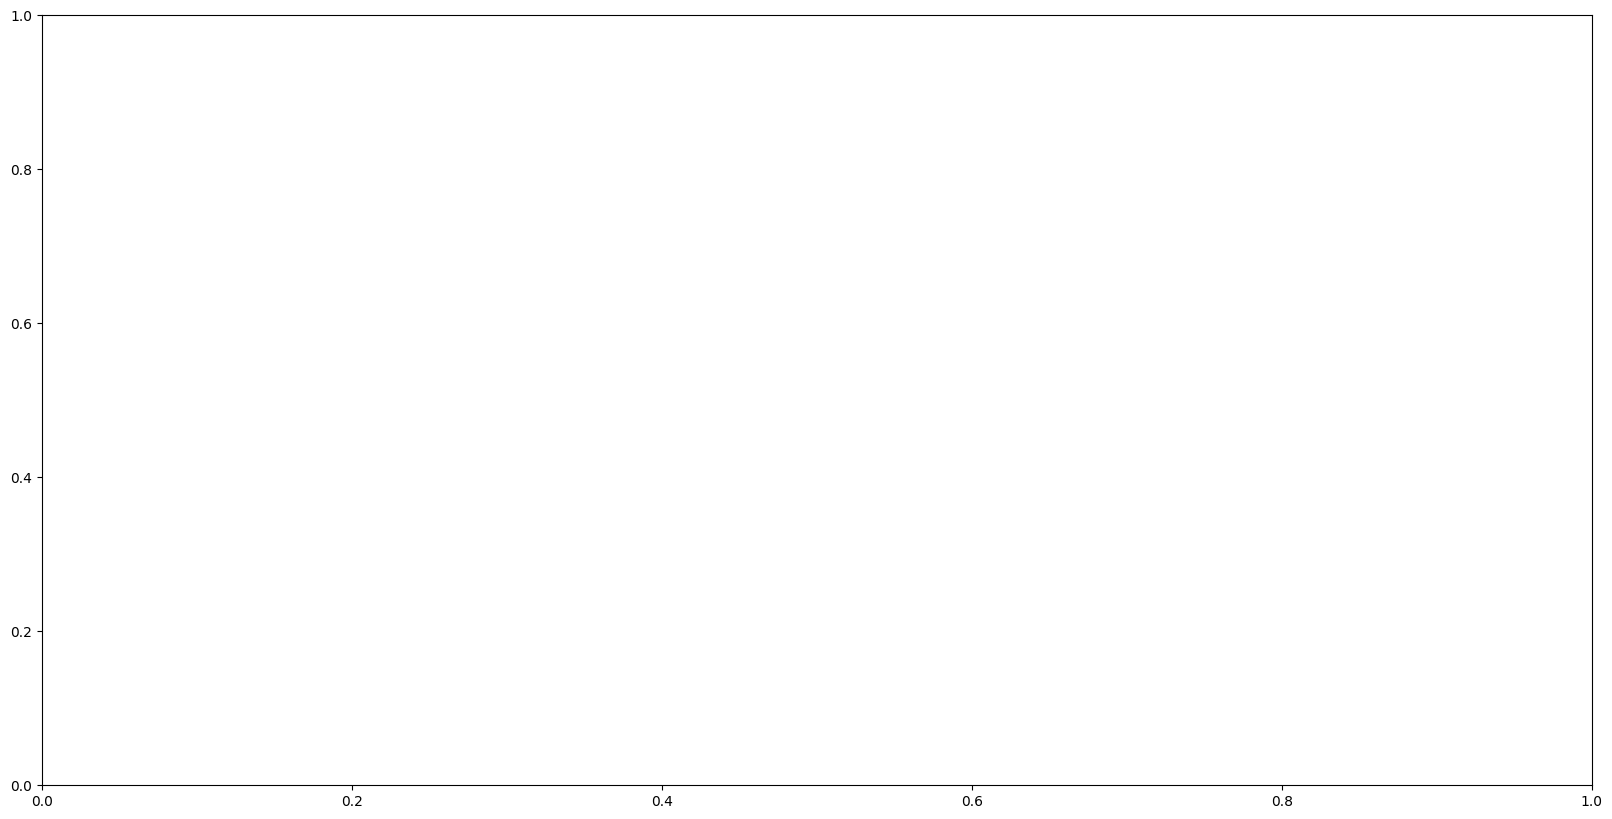

In [62]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize = (20,10))

sns.swarmplot(movies['MPAA_Rating'], movies['Body_Count_Min'])